In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
nome_arquivo_csv = 'dataset.csv'
dados = pd.read_csv(nome_arquivo_csv)


# 1.Descrição de projeto:


## 1.1 Contexto de algumas variáveis:


# 2. Pré-processamento

## 2.1 Leitura dos dados

In [4]:
display(dados)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


## 2.2 Analise Descritiva:


### 2.2.1 Entendendo os conceitos

Aqui entendermos melhor as variaveis de maior interesse e como elas se relacionam. Elas serão dividas em duas categorias, serão variáveis qualitativas e quantitativas.Elas serão analisadas por meio de gráficos de forma que entendamos melhor seus comportamentos e suas frequências.  
As variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização. 
 
As variáveis acima são qualitativas, veremos posteriormente se elas tem relação com a taxa de mortalidade.Elas foram escolhidas de modo a verificar se gênero, doenças e local de onde foram admitidas tem relação com morte.  
Já as variáveis abaixo são qualitativas, serão analisadas para observar sua relação com a taxa de mortalidade, algumas delas foram escolihdas com base no diagnóstico APACHE-III pois são as categorias que mais pontuam nesse diagnóstico e assim podem ter grande interesse na taxa de mortalidade.  

__AINDA FALTA COLOCAR AS DE APACHE-III__

* __bmi__: representa o indice de massa corporeo da pessoa.  
* __age__: representa a idade da pessoa.  
Já essas outras duas variáveis  __bmi__ e __age__ serão analisadas para observar se a taxa mortalidade sobe de acordo com peso ou idade.  




### 2.2.2 Funções

Aqui estarão asfunções de associção entre variaveis qualitativas e quantitativas usadas para descrever e entender relações das variáveis por meio de gráficos e tabelas.

In [5]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
          
     dados_grafico = dataframe[var].value_counts()
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')

In [6]:
def qualitativaXquantativa(varName1,varName2,dataframe):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = dataframe.boxplot(column=varName1,figsize=(10,6),vert=False, by=varName2);
    boxVarS.set_ylabel(varName1,fontsize=12);
    boxVarS.set_xlabel(varName2,fontsize=12);

In [7]:
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12)

In [8]:
def DeathsBy(varName,dataframe):
    plt.figure(figsize=(8, 6))
    sn.barplot(dataframe,x = varName,y = 'hospital_death')
    plt.xlabel(varName)
    plt.ylabel('Count')
    plt.title(f'Morte das pessoas por{varName}')

### 2.2.3 Frequências das qualitativas

#### 2.2.3.1 Distribuição das frequências para as variáveis escolhidas

__*__ Aqui analisaremosas distribuições de freqências para as variáveis escolhidas e posteriormente veremos se essas variáveis terão relação com a mortalidade no hospital.

,gender,Frequência
0,M,0.539536
1,F,0.460464


******** Conditional Proportion: hospital_death per gender ********


hospital_death,0,1
gender,,
F,0.911627,0.088373
M,0.915583,0.084417


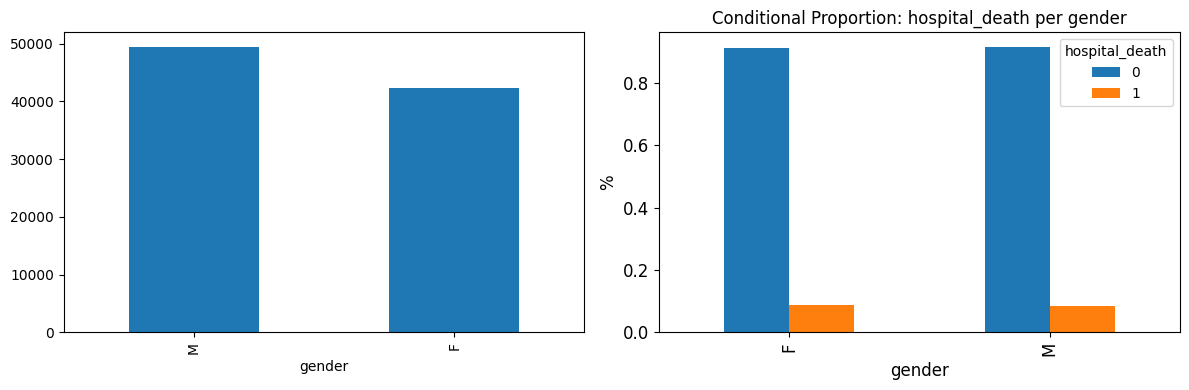

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

,leukemia,Frequência
0,0.0,0.992934
1,1.0,0.007066


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914659,0.085341
1.0,0.814930,0.185070


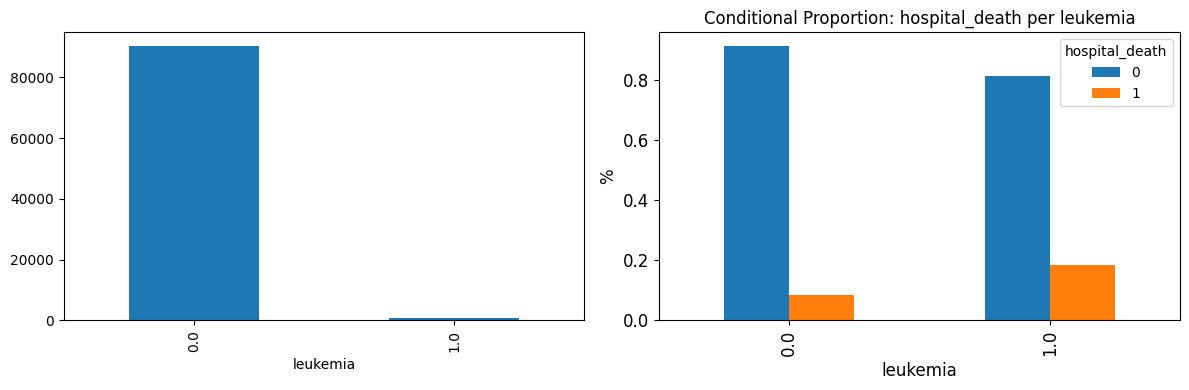

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

,diabetes_mellitus,Frequência
0,0.0,0.774808
1,1.0,0.225192


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911568,0.088432
1.0,0.922165,0.077835


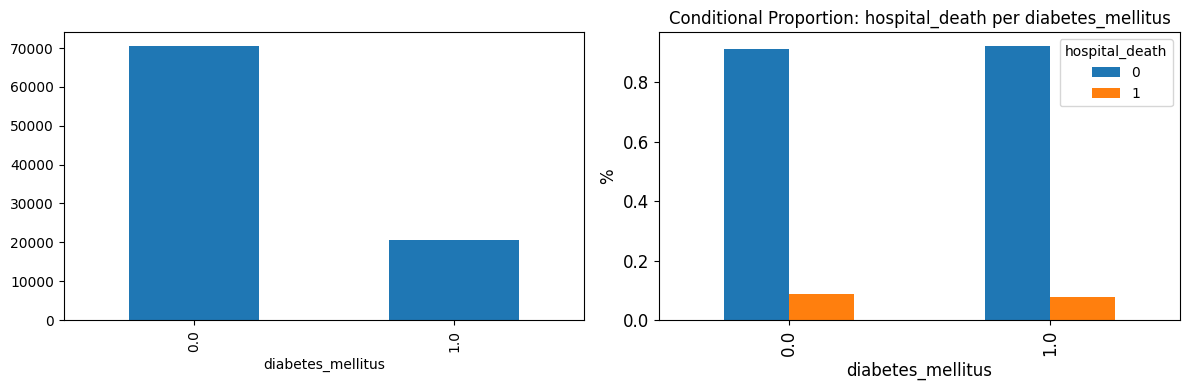

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979362
1,1.0,0.020638


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.916035,0.083965
1.0,0.815229,0.184771


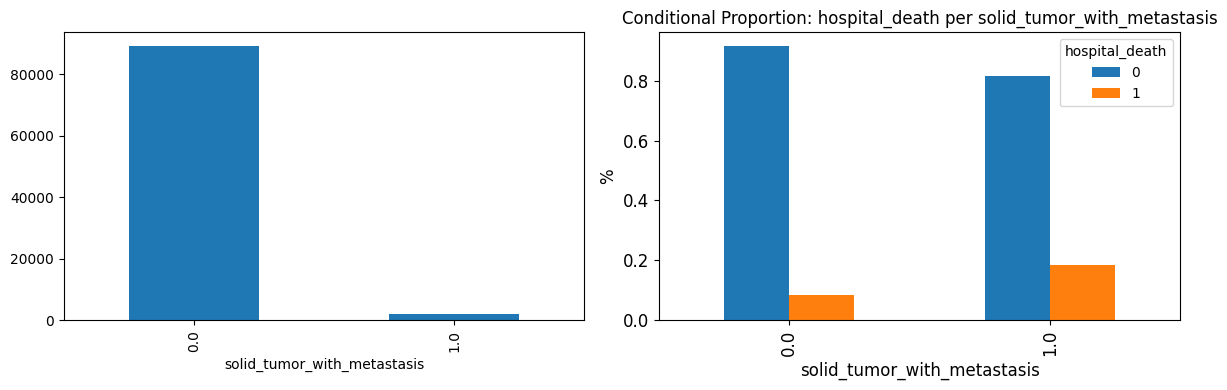

'solid_tumor_with_metastasis'

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()
"solid_tumor_with_metastasis"

,icu_admit_source,Frequência
0,Accident & Emergency,0.590168
1,Operating Room / Recovery,0.204288
2,Floor,0.170424
3,Other Hospital,0.025742
4,Other ICU,0.009378


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.913615,0.086385
Floor,0.865864,0.134136
Operating Room / Recovery,0.962700,0.037300
Other Hospital,0.865564,0.134436
Other ICU,0.855646,0.144354


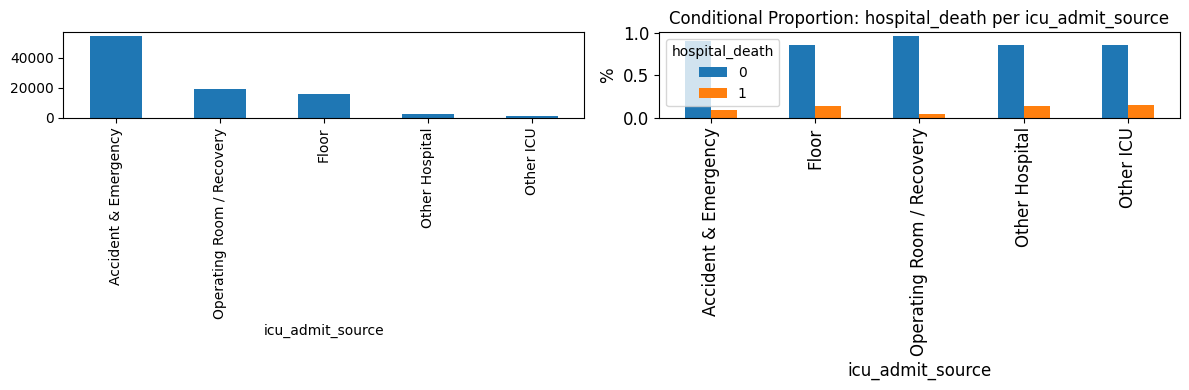

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()


### 2.2.4 Graficos das quantitativas